In [1]:
#importing neccesary packages
import numpy as np
import pylab as pl

from IPython.display import display, clear_output
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#we are creating random numbers, so we seet a seed
np.random.seed(333)

In [3]:
#we create two sets of data clouds, the second one with different mean but same deviation
random_1 = np.random.randn(2,100)
random_2 = np.random.randn(2,100) + 2

In [15]:
"Checking shapes"
print "Random 1:",random_1.shape
print "Random 2:",random_2.shape

Random 1: (2L, 100L)
Random 2: (2L, 100L)


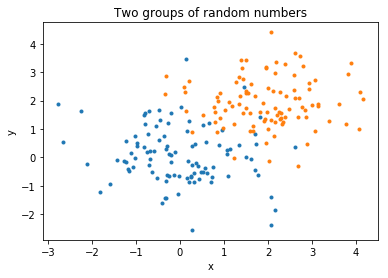

In [17]:

pl.plot(random_1[0], random_1[1],'.')
pl.plot(random_2[0], random_2[1],'.')
pl.title("Two groups of random numbers")
pl.xlabel('x')
pl.ylabel('y');

In [8]:
#we create a function to check the distance of to each point to the center
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [18]:
#Normalizing
random_stack = np.hstack([random_1, random_2])
min(random_stack[0]), max(random_stack[0])

(-2.7721666442989643, 4.1499677309187222)

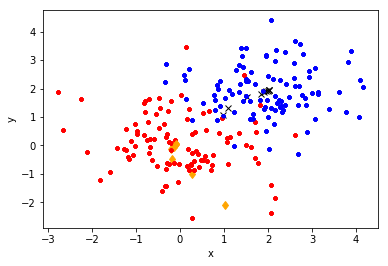

old center:
[[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]

new center:
[[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


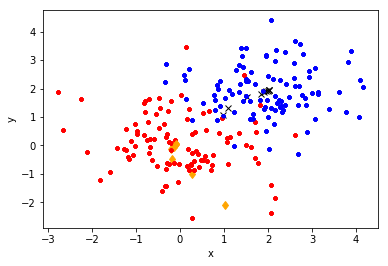

In [20]:
#Plotting
fig, ax = plt.subplots()
centers = np.array([[0.,-1.], [0,-2]]) #this sets the centers at those coordinates
for i in range (0,10):
        #we calculate the distance from each point to a center, if the point is closer to the other center,
        #then a new center is calculated. This is repeated N times

    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])
    newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    
    centers=newc #replacing the centers with the new ones
    #plotting new centers and point cloud
    
    pl.plot(random_1[0], random_1[1],'r.')
    pl.plot(random_2[0], random_2[1],'b.')
    pl.plot(centers[0,0], centers[0,1],'x',color="black",lw=3)
    pl.plot(centers[1,0], centers[1,1],'d',color="orange")
    clear_output(wait=True)
    display(fig)
    pl.xlabel('x')
    pl.ylabel('y')
    print "old center:"
    print centers
    print
    print "new center:"
    print newc
pl.show()
